## Machine Learning Challenge 5-Predict the probability of whether an ad will get clicked or not

In [1067]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [1068]:
#reading the csv file
df=pd.read_csv('train.csv',nrows=100000)

In [1069]:
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [1070]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ID             100000 non-null object
datetime       100000 non-null object
siteid         89843 non-null float64
offerid        100000 non-null int64
category       100000 non-null int64
merchant       100000 non-null int64
countrycode    100000 non-null object
browserid      95008 non-null object
devid          84990 non-null object
click          100000 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


In [1071]:
#Stratified Sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["click"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [1072]:
strat_train_set['click'].value_counts()/len(strat_train_set)

0    0.96345
1    0.03655
Name: click, dtype: float64

In [1073]:
strat_test_set.click.value_counts()/len(strat_test_set)

0    0.96345
1    0.03655
Name: click, dtype: float64

In [1074]:
strat_train_set.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
52442,IDcjFOAz8,2017-01-14 11:23:40,662014.0,44578,82877,54692138,b,Mozilla,Desktop,0
46634,IDLdefX1q,2017-01-12 11:02:54,4488235.0,15508,6906,99510044,a,Internet Explorer,Tablet,0
17488,IDEzX5E2w,2017-01-11 08:34:31,3203667.0,990887,42227,49384126,f,NaN,Mobile,0
30625,IDC7nFLSl,2017-01-14 15:25:15,7483326.0,795517,74580,20301556,d,Firefox,Mobile,0
31996,IDexFELOW,2017-01-16 16:19:48,6784802.0,941074,82877,38492160,a,Firefox,Mobile,0


In [1075]:
X_train,X_test=strat_train_set,strat_test_set

In [1076]:
#X_train=strat_train_set.drop('click',axis=1)
#y_train=strat_train_set['click']
#X_test,y_test=strat_test_set.drop('click',axis=1),strat_test_set['click']

In [1077]:
X_train.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
52442,IDcjFOAz8,2017-01-14 11:23:40,662014.0,44578,82877,54692138,b,Mozilla,Desktop,0
46634,IDLdefX1q,2017-01-12 11:02:54,4488235.0,15508,6906,99510044,a,Internet Explorer,Tablet,0
17488,IDEzX5E2w,2017-01-11 08:34:31,3203667.0,990887,42227,49384126,f,NaN,Mobile,0
30625,IDC7nFLSl,2017-01-14 15:25:15,7483326.0,795517,74580,20301556,d,Firefox,Mobile,0
31996,IDexFELOW,2017-01-16 16:19:48,6784802.0,941074,82877,38492160,a,Firefox,Mobile,0


In [1078]:
X_test.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
72573,IDxRMJKSB,2017-01-20 13:37:04,9019028.0,789458,25436,81758577,a,InternetExplorer,Desktop,0
72545,IDC4i3RMX,2017-01-15 12:21:18,1276895.0,762568,904,26391770,b,Mozilla,NaN,0
98647,IDwEOVpgp,2017-01-11 11:36:56,5372894.0,78740,64452,87726715,b,Edge,NaN,0
7233,IDW6RQ9BF,2017-01-20 11:54:50,3183092.0,620324,33638,555603,a,Mozilla,NaN,0
59567,IDAewPXOk,2017-01-11 13:02:50,2901432.0,637788,92704,93157824,f,Mozilla Firefox,Desktop,0


In [1079]:
#X_train['datetime']=pd.to_datetime(X_train['datetime'])
#X_test['datetime']=pd.to_datetime(X_test['datetime'])

In [1080]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 52442 to 2525
Data columns (total 10 columns):
ID             80000 non-null object
datetime       80000 non-null object
siteid         71896 non-null float64
offerid        80000 non-null int64
category       80000 non-null int64
merchant       80000 non-null int64
countrycode    80000 non-null object
browserid      75973 non-null object
devid          67879 non-null object
click          80000 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 6.7+ MB


In [1081]:
X_train.isnull().sum(axis=0)/X_train.shape[0]*(100)
#X_test.isnull().sum(axis=0)/X_test.shape[0]*(100)


ID              0.00000
datetime        0.00000
siteid         10.13000
offerid         0.00000
category        0.00000
merchant        0.00000
countrycode     0.00000
browserid       5.03375
devid          15.15125
click           0.00000
dtype: float64

In [1082]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 52442 to 2525
Data columns (total 10 columns):
ID             80000 non-null object
datetime       80000 non-null object
siteid         71896 non-null float64
offerid        80000 non-null int64
category       80000 non-null int64
merchant       80000 non-null int64
countrycode    80000 non-null object
browserid      75973 non-null object
devid          67879 non-null object
click          80000 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 6.7+ MB


### Summary Statistics

In [1083]:
X_train.describe(include='all')

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
count,80000,80000,7.189600e+04,80000.000000,80000.000000,8.000000e+04,80000,75973,67879,80000.000000
unique,80000,69763,NaN,NaN,NaN,NaN,6,11,3,NaN
top,IDvTuv3Yf,2017-01-11 17:50:16,NaN,NaN,NaN,NaN,b,Edge,Mobile,NaN
freq,1,6,NaN,NaN,NaN,NaN,34791,22805,26543,NaN
mean,NaN,NaN,5.021140e+06,494009.089412,42204.654613,4.900772e+07,NaN,NaN,NaN,0.036550
std,NaN,NaN,2.901282e+06,289548.436755,29508.999385,2.916977e+07,NaN,NaN,NaN,0.187655
min,NaN,NaN,2.510000e+02,1.000000,97.000000,2.604430e+05,NaN,NaN,NaN,0.000000
25%,NaN,NaN,2.516055e+06,244242.000000,14960.000000,2.639177e+07,NaN,NaN,NaN,0.000000
50%,NaN,NaN,4.965755e+06,491531.000000,40339.000000,4.861553e+07,NaN,NaN,NaN,0.000000
75%,NaN,NaN,7.574816e+06,744226.000000,67817.000000,7.436361e+07,NaN,NaN,NaN,0.000000


In [1084]:
X_train['devid'].fillna('Others',inplace=True)
X_test['devid'].fillna('Others',inplace=True)

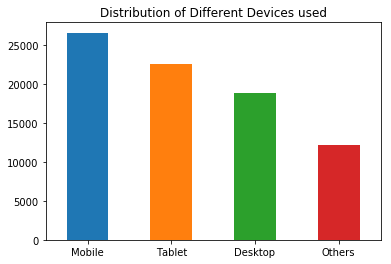

In [1085]:
X_train['devid'].value_counts().plot(kind='bar',rot=0,title='Distribution of Different Devices used')

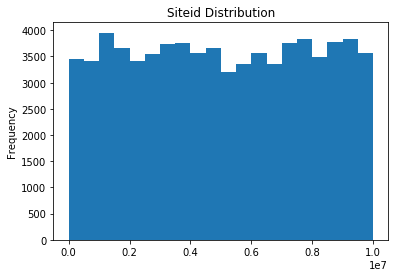

In [1086]:
X_train['siteid'].plot(kind='hist',title='Siteid Distribution',bins=20)

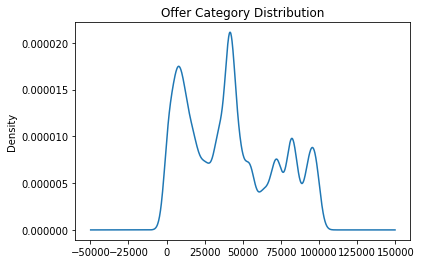

In [1087]:
X_train['category'].plot(kind='kde',title='Offer Category Distribution')

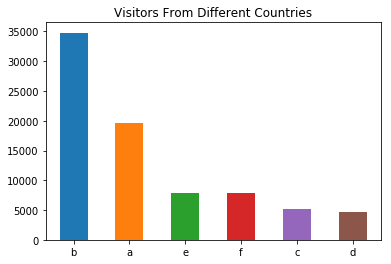

In [1088]:
X_train['countrycode'].value_counts().plot(kind='bar',rot=0,title='Visitors From Different Countries')

In [1089]:
X_train['browserid'].replace(['Mozilla Firefox','Mozilla','Google Chrome','InternetExplorer','Internet Explorer'],['Firefox','Firefox','Chrome','IE','IE'],inplace=True)
X_test['browserid'].replace(['Mozilla Firefox','Mozilla','Google Chrome','InternetExplorer','Internet Explorer'],['Firefox','Firefox','Chrome','IE','IE'],inplace=True)
X_train['browserid'].fillna('Others',inplace=True)
X_test['browserid'].fillna('Others',inplace=True)

In [1090]:
pd.crosstab(X_train['devid'],X_train['browserid'])

browserid,Chrome,Edge,Firefox,IE,Opera,Others,Safari
devid,,,,,,,
Desktop,1962,0,11791,4156,0,957,0
Mobile,3989,0,18677,1913,619,1345,0
Others,1039,3463,5522,1318,101,576,102
Tablet,0,19342,0,1349,0,1149,630


In [1091]:
ct=pd.crosstab(X_train['devid'],X_train['countrycode'])

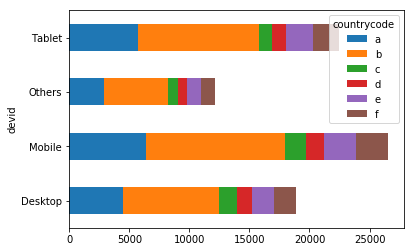

In [1092]:
ct.plot(kind='barh',stacked=True)

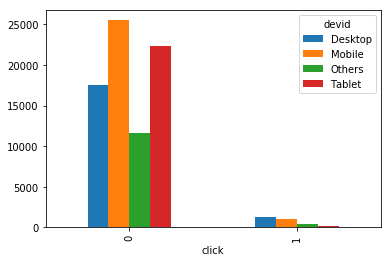

In [1093]:
pd.pivot_table(index='click',columns='devid',values='browserid',aggfunc='count',data=X_train).plot(kind='bar')

In [1094]:
pd.pivot_table(index='click',columns='devid',values='browserid',aggfunc='count',data=X_train)

devid,Desktop,Mobile,Others,Tablet
click,,,,
0,17578,25484,11674,22340
1,1288,1059,447,130


In [1095]:
pd.pivot_table(index='click',columns='countrycode',values='browserid',aggfunc='count',data=X_train)

countrycode,a,b,c,d,e,f
click,,,,,,
0,19411,34653,3761,3850,7739,7662
1,162,138,1475,861,144,144


In [1096]:
X_train.drop('datetime',axis=1).groupby(['devid','browserid','click']).count()

ID  siteid  offerid  category  merchant  \
devid   browserid click                                               
Desktop Chrome    0       1888    1686     1888      1888      1888   
                  1         74      65       74        74        74   
        Firefox   0      11700   10496    11700     11700     11700   
                  1         91      86       91        91        91   
        IE        0       3094    2792     3094      3094      3094   
                  1       1062     954     1062      1062      1062   
        Others    0        896     803      896       896       896   
                  1         61      51       61        61        61   
Mobile  Chrome    0       3195    2864     3195      3195      3195   
                  1        794     704      794       794       794   
        Firefox   0      18580   16686    18580     18580     18580   
                  1         97      87       97        97        97   
        IE        0       1831    1641     1831      1831      1831   
                  1         82      72       82        82        82   
        Opera     0        592     542      592       592       592   
                  1         27      27       27        27        27   
        Others    0       1286    1153     1286      1286      1286   
                  1         59      51       59        59        59   
Others  Chrome    0        895     809      895       895       895   
                  1        144     128      144       144       144   
        Edge      0       3452    3103     3452      3452      3452   
                  1         11      10       11        11        11   
        Firefox   0       5482    4936     5482      5482      5482   
                  1         40      36       40        40        40   
        IE        0       1102     985     1102      1102      1102   
                  1        216     199      216       216       216   
        Opera     0         96      83       96        96        96   
                  1          5       4        5         5         5   
        Others    0        551     498      551       551       551   
                  1         25      25       25        25        25   
        Safari    0         96      82       96        96        96   
                  1          6       5        6         6         6   
Tablet  Edge      0      19299   17397    19299     19299     19299   
                  1         43      40       43        43        43   
        IE        0       1302    1156     1302      1302      1302   
                  1         47      43       47        47        47   
        Others    0       1141    1026     1141      1141      1141   
                  1          8       7        8         8         8   
        Safari    0        598     535      598       598       598   
                  1         32      29       32        32        32   

                         countrycode  
devid   browserid click               
Desktop Chrome    0             1888  
                  1               74  
        Firefox   0            11700  
                  1               91  
        IE        0             3094  
                  1             1062  
        Others    0              896  
                  1               61  
Mobile  Chrome    0             3195  
                  1              794  
        Firefox   0            18580  
                  1               97  
        IE        0             1831  
                  1               82  
        Opera     0              592  
                  1               27  
        Others    0             1286  
                  1               59  
Others  Chrome    0              895  
                  1              144  
        Edge      0             3452  
                  1               11  
        Firefox   0             5482  
                  1               40  
        IE        0            

In [1097]:
siteid_freq = X_train.siteid.value_counts()
X_train['siteid_freq'] = 0
X_train['siteid_freq'] = X_train.groupby('siteid')['siteid'].transform('count')
X_test['siteid_freq'] = X_test.groupby('siteid')['siteid'].transform('count')
X_train['siteid_freq']=pd.qcut(X_train['siteid_freq'],4,labels=['very_low_traffic','low_traffic','high_traffic','very_high_traffic'])
X_test['siteid_freq']=pd.qcut(X_test['siteid'],4,labels=['very_low_traffic','low_traffic','high_traffic','very_high_traffic'])


In [1098]:
#X_train.groupby('siteid_freq')[['click','merchant']].count()
merchant_freq = X_train.merchant.value_counts()
X_train['merchant_freq'] = 0
X_test['merchant_freq'] = 0
X_train['merchant_freq'] = X_train.groupby('merchant').transform('count')
X_test['merchant_freq'] = X_test.groupby('merchant').transform('count')
X_train['merchant_freq']=pd.qcut(X_train['merchant_freq'],4,labels=['very_low_value_merchant','low_value_merchant','high_value_merchant','very_high_value_merchant'])
X_test['merchant_freq']=pd.qcut(X_test['merchant_freq'],4,labels=['very_low_value_merchant','low_value_merchant','high_value_merchant','very_high_value_merchant'])



In [1099]:
#X_train.groupby('siteid_freq')[['click','merchant']].count()
category_freq = X_train.category.value_counts()
X_train['category_freq'] = 0
X_test['category_freq'] = 0
X_train['category_freq'] = X_train.groupby('category').transform('count')
X_test['category_freq'] = X_test.groupby('category').transform('count')
X_train['category_freq']=pd.qcut(X_train['category_freq'],4,labels=['very_low_category_offers','low_category_offers','high_category_offers','very_high_category_offers'])
X_test['category_freq']=pd.qcut(X_test['category_freq'],4,labels=['very_low_category_offers','low_category_offers','high_category_offers','very_high_category_offers'])



In [1100]:
X_train.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,siteid_freq,merchant_freq,category_freq
52442,IDcjFOAz8,2017-01-14 11:23:40,662014.0,44578,82877,54692138,b,Firefox,Desktop,0,high_traffic,very_low_value_merchant,high_category_offers
46634,IDLdefX1q,2017-01-12 11:02:54,4488235.0,15508,6906,99510044,a,IE,Tablet,0,very_high_traffic,very_high_value_merchant,very_high_category_offers
17488,IDEzX5E2w,2017-01-11 08:34:31,3203667.0,990887,42227,49384126,f,Others,Mobile,0,high_traffic,very_high_value_merchant,very_high_category_offers
30625,IDC7nFLSl,2017-01-14 15:25:15,7483326.0,795517,74580,20301556,d,Firefox,Mobile,0,very_high_traffic,high_value_merchant,very_low_category_offers
31996,IDexFELOW,2017-01-16 16:19:48,6784802.0,941074,82877,38492160,a,Firefox,Mobile,0,low_traffic,low_value_merchant,high_category_offers


In [1101]:
pd.crosstab([X_train.siteid_freq, X_train.merchant], X_train.click)

click                         0   1
siteid_freq       merchant         
very_low_traffic  260443      9   1
                  555603    523  52
                  1064733     8   8
                  1084693    14   1
                  1143033     7   3
                  1185845    23   3
                  1189152    63   1
                  1396462    12   2
                  1434817    15   4
                  1436904    45   6
                  1569330    65   3
                  1821447     1   0
                  1873447     6   1
                  2050923   203  17
                  2316522    12   0
                  2402404     0   0
                  2450342     2   0
                  2518327    25   1
                  2750514    19   2
                  2835657   144   7
                  2913632     1   0
                  3151081    41   5
                  3156697   130   6
                  3402198    50   1
                  3638268    17   0
                  3818917     1   0
                  4000296   443  30
                  4025337     2  13
                  4237811    27   3
                  4268466     0   1
...                         ...  ..
very_high_traffic 96190219    0   0
                  96206255   14   0
                  96248153    1   0
                  96260990    0   0
                  96277272   10   0
                  96414128    2   0
                  96498275    2   0
                  96598003    0   0
                  96631444    0   0
                  96823930  138   0
                  96986382    1   0
                  97087827    0   0
                  97636121    0   0
                  98166279   29   0
                  98302586    1   0
                  98322322    1   0
                  98332604    3   0
                  98659187    3   0
                  98752616    4   0
                  98763943    0   0
                  98830533   55   0
                  99096064    2   0
                  99251404    0   0
                  99273711    3   0
                  99510044  740   8
                  99512672    0   0
                  99558603  155   2
                  99595716   18   0
                  99684291   20   0
                  99770433    4   0

[2496 rows x 2 columns]

In [1102]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [1103]:
X_train.siteid_freq.fillna('very_low_traffic',inplace=True)
X_test.siteid_freq.fillna('very_low_traffic',inplace=True)

In [1104]:
X_test.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,siteid_freq,merchant_freq,category_freq
72573,IDxRMJKSB,2017-01-20 13:37:04,9019028.0,789458,25436,81758577,a,IE,Desktop,0,very_high_traffic,low_value_merchant,very_low_category_offers
72545,IDC4i3RMX,2017-01-15 12:21:18,1276895.0,762568,904,26391770,b,Firefox,Others,0,very_low_traffic,very_high_value_merchant,very_high_category_offers
98647,IDwEOVpgp,2017-01-11 11:36:56,5372894.0,78740,64452,87726715,b,Edge,Others,0,high_traffic,very_low_value_merchant,low_category_offers
7233,IDW6RQ9BF,2017-01-20 11:54:50,3183092.0,620324,33638,555603,a,Firefox,Others,0,low_traffic,very_high_value_merchant,high_category_offers
59567,IDAewPXOk,2017-01-11 13:02:50,2901432.0,637788,92704,93157824,f,Firefox,Desktop,0,low_traffic,high_value_merchant,high_category_offers


In [1105]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
X_test['datetime'] = pd.to_datetime(X_test['datetime'])

In [1106]:
X_train['Weekday'] = X_train['datetime'].dt.weekday
X_train['Month'] = X_train['datetime'].dt.month
X_test['Weekday'] = X_test['datetime'].dt.weekday
X_test['Month'] = X_test['datetime'].dt.month


In [1107]:
X_train.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,siteid_freq,merchant_freq,category_freq,Weekday,Month
52442,IDcjFOAz8,2017-01-14 11:23:40,662014.0,44578,82877,54692138,b,Firefox,Desktop,0,high_traffic,very_low_value_merchant,high_category_offers,5,1
46634,IDLdefX1q,2017-01-12 11:02:54,4488235.0,15508,6906,99510044,a,IE,Tablet,0,very_high_traffic,very_high_value_merchant,very_high_category_offers,3,1
17488,IDEzX5E2w,2017-01-11 08:34:31,3203667.0,990887,42227,49384126,f,Others,Mobile,0,high_traffic,very_high_value_merchant,very_high_category_offers,2,1
30625,IDC7nFLSl,2017-01-14 15:25:15,7483326.0,795517,74580,20301556,d,Firefox,Mobile,0,very_high_traffic,high_value_merchant,very_low_category_offers,5,1
31996,IDexFELOW,2017-01-16 16:19:48,6784802.0,941074,82877,38492160,a,Firefox,Mobile,0,low_traffic,low_value_merchant,high_category_offers,0,1


In [1108]:
X_test.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,siteid_freq,merchant_freq,category_freq,Weekday,Month
72573,IDxRMJKSB,2017-01-20 13:37:04,9019028.0,789458,25436,81758577,a,IE,Desktop,0,very_high_traffic,low_value_merchant,very_low_category_offers,4,1
72545,IDC4i3RMX,2017-01-15 12:21:18,1276895.0,762568,904,26391770,b,Firefox,Others,0,very_low_traffic,very_high_value_merchant,very_high_category_offers,6,1
98647,IDwEOVpgp,2017-01-11 11:36:56,5372894.0,78740,64452,87726715,b,Edge,Others,0,high_traffic,very_low_value_merchant,low_category_offers,2,1
7233,IDW6RQ9BF,2017-01-20 11:54:50,3183092.0,620324,33638,555603,a,Firefox,Others,0,low_traffic,very_high_value_merchant,high_category_offers,4,1
59567,IDAewPXOk,2017-01-11 13:02:50,2901432.0,637788,92704,93157824,f,Firefox,Desktop,0,low_traffic,high_value_merchant,high_category_offers,2,1


In [1109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 52442 to 2525
Data columns (total 15 columns):
ID               80000 non-null object
datetime         80000 non-null datetime64[ns]
siteid           71896 non-null float64
offerid          80000 non-null int64
category         80000 non-null int64
merchant         80000 non-null int64
countrycode      80000 non-null object
browserid        80000 non-null object
devid            80000 non-null object
click            80000 non-null int64
siteid_freq      80000 non-null category
merchant_freq    80000 non-null category
category_freq    80000 non-null category
Weekday          80000 non-null int64
Month            80000 non-null int64
dtypes: category(3), datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 8.2+ MB


In [1110]:
ctr_dummy_train=pd.get_dummies(X_train['countrycode'])
browser_dummy_train=pd.get_dummies(X_train['browserid'])
dev_dummy_train=pd.get_dummies(X_train['devid'])
Weekday_dummy_train=pd.get_dummies(X_train['Weekday'])
Month_dummy_train=pd.get_dummies(X_train['Month'])
sitebin_dummy_train=pd.get_dummies(X_train['siteid_freq'])
merchant_dummy_train=pd.get_dummies(X_train['merchant_freq'])
category_dummy_train=pd.get_dummies(X_train['category_freq'])

In [1111]:
ctr_dummy=pd.get_dummies(X_test['countrycode'])
browser_dummy=pd.get_dummies(X_test['browserid'])
dev_dummy=pd.get_dummies(X_test['devid'])
Weekday_dummy=pd.get_dummies(X_test['Weekday'])
Month_dummy=pd.get_dummies(X_test['Month'])
sitebin_dummy=pd.get_dummies(X_test['siteid_freq'])
merchant_dummy=pd.get_dummies(X_test['merchant_freq'])
category_dummy=pd.get_dummies(X_test['category_freq'])

In [1112]:
X_test=pd.concat((X_test,ctr_dummy,browser_dummy,dev_dummy,Weekday_dummy,Month_dummy,sitebin_dummy,merchant_dummy,category_dummy),axis=1)
X_train=pd.concat((X_train,ctr_dummy_train,browser_dummy_train,dev_dummy_train,Weekday_dummy_train,Month_dummy_train,sitebin_dummy_train,merchant_dummy_train,category_dummy_train),axis=1)

In [1113]:
cols_to_drop=['offerid','category','merchant','merchant_freq','siteid_freq','category_freq','ID','siteid','datetime','browserid','devid','Month','SiteBin','Weekday','countrycode']

for i in cols_to_drop:
    X_train.drop(i,axis=1,inplace=True)
    X_test.drop(i,axis=1,inplace=True)

In [1114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 52442 to 2525
Data columns (total 38 columns):
click                        80000 non-null int64
a                            80000 non-null uint8
b                            80000 non-null uint8
c                            80000 non-null uint8
d                            80000 non-null uint8
e                            80000 non-null uint8
f                            80000 non-null uint8
Chrome                       80000 non-null uint8
Edge                         80000 non-null uint8
Firefox                      80000 non-null uint8
IE                           80000 non-null uint8
Opera                        80000 non-null uint8
Others                       80000 non-null uint8
Safari                       80000 non-null uint8
Desktop                      80000 non-null uint8
Mobile                       80000 non-null uint8
Others                       80000 non-null uint8
Tablet                       80000 non

In [1115]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 72573 to 4647
Data columns (total 38 columns):
click                        20000 non-null int64
a                            20000 non-null uint8
b                            20000 non-null uint8
c                            20000 non-null uint8
d                            20000 non-null uint8
e                            20000 non-null uint8
f                            20000 non-null uint8
Chrome                       20000 non-null uint8
Edge                         20000 non-null uint8
Firefox                      20000 non-null uint8
IE                           20000 non-null uint8
Opera                        20000 non-null uint8
Others                       20000 non-null uint8
Safari                       20000 non-null uint8
Desktop                      20000 non-null uint8
Mobile                       20000 non-null uint8
Others                       20000 non-null uint8
Tablet                       20000 non

In [1116]:
y_train,y_test=X_train['click'],X_test['click']


In [1117]:
X_train=X_train.drop('click',axis=1)
X_test=X_test.drop('click',axis=1)

In [1118]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80000, 37), (80000,), (20000, 37), (20000,))

In [1119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 52442 to 2525
Data columns (total 37 columns):
a                            80000 non-null uint8
b                            80000 non-null uint8
c                            80000 non-null uint8
d                            80000 non-null uint8
e                            80000 non-null uint8
f                            80000 non-null uint8
Chrome                       80000 non-null uint8
Edge                         80000 non-null uint8
Firefox                      80000 non-null uint8
IE                           80000 non-null uint8
Opera                        80000 non-null uint8
Others                       80000 non-null uint8
Safari                       80000 non-null uint8
Desktop                      80000 non-null uint8
Mobile                       80000 non-null uint8
Others                       80000 non-null uint8
Tablet                       80000 non-null uint8
0                            80000 non

In [1120]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 72573 to 4647
Data columns (total 37 columns):
a                            20000 non-null uint8
b                            20000 non-null uint8
c                            20000 non-null uint8
d                            20000 non-null uint8
e                            20000 non-null uint8
f                            20000 non-null uint8
Chrome                       20000 non-null uint8
Edge                         20000 non-null uint8
Firefox                      20000 non-null uint8
IE                           20000 non-null uint8
Opera                        20000 non-null uint8
Others                       20000 non-null uint8
Safari                       20000 non-null uint8
Desktop                      20000 non-null uint8
Mobile                       20000 non-null uint8
Others                       20000 non-null uint8
Tablet                       20000 non-null uint8
0                            20000 non

In [1121]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16,
random_state=42)

In [1122]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
n_jobs=-1)

In [1123]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=300, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [1124]:
y_pred = bc.predict(X_test)

In [1125]:
accuracy = accuracy_score(y_test, y_pred)

In [1126]:
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.963


In [1127]:
adb_clf = AdaBoostClassifier(base_estimator=dt,
n_estimators=300)

In [1128]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=None)

In [1129]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 72573 to 4647
Data columns (total 37 columns):
a                            20000 non-null uint8
b                            20000 non-null uint8
c                            20000 non-null uint8
d                            20000 non-null uint8
e                            20000 non-null uint8
f                            20000 non-null uint8
Chrome                       20000 non-null uint8
Edge                         20000 non-null uint8
Firefox                      20000 non-null uint8
IE                           20000 non-null uint8
Opera                        20000 non-null uint8
Others                       20000 non-null uint8
Safari                       20000 non-null uint8
Desktop                      20000 non-null uint8
Mobile                       20000 non-null uint8
Others                       20000 non-null uint8
Tablet                       20000 non-null uint8
0                            20000 non

In [1130]:
importances = adb_clf.feature_importances_
importances

array([0.05984084, 0.18532229, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.14720604, 0.09371442, 0.        ,
       0.        , 0.        , 0.        , 0.01097611, 0.05195076,
       0.        , 0.11200845, 0.        , 0.00070469, 0.00550246,
       0.        , 0.00109958, 0.        , 0.        , 0.        ,
       0.15764663, 0.00339864, 0.01405137, 0.03213802, 0.00850854,
       0.02773521, 0.01651006, 0.01376986, 0.01033307, 0.02558078,
       0.01386195, 0.00814024])

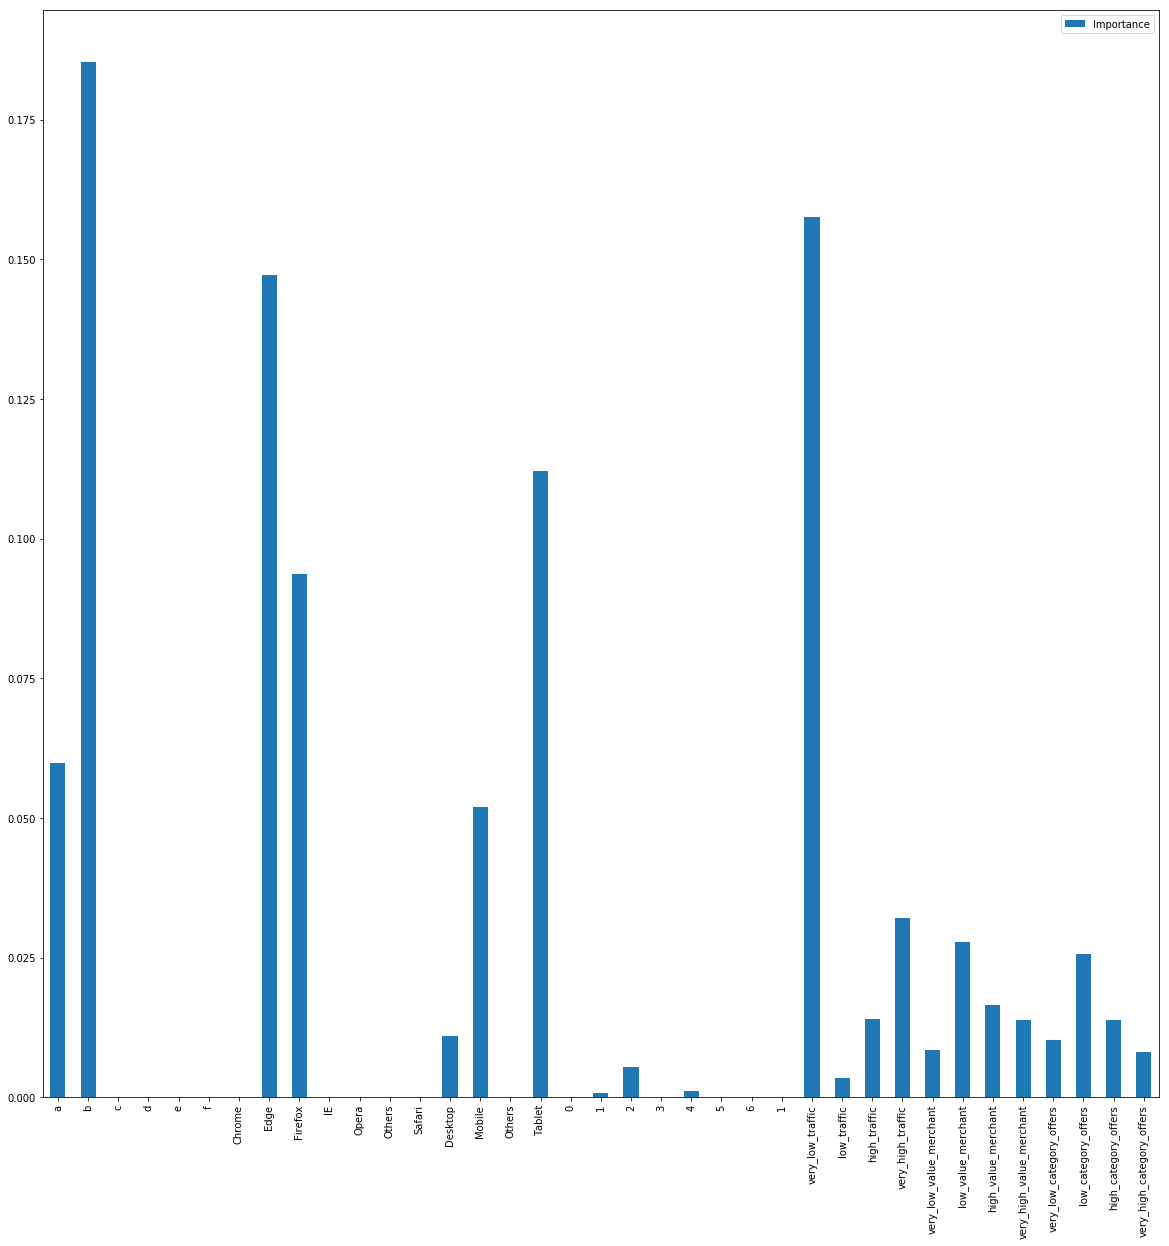

In [1131]:
feature_set = pd.DataFrame(index = X_train.columns, data = importances, columns=['Importance'])
feature_set.plot(kind='bar',figsize=(20,20))

In [1132]:
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [1133]:
from sklearn.metrics import classification_report
y_pred=np.where(y_pred_proba>0.5,1,0)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98     19269
          1       0.42      0.15      0.22       731

avg / total       0.95      0.96      0.95     20000



In [1134]:
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
adb_clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=300, random_state=None)

In [1135]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.92


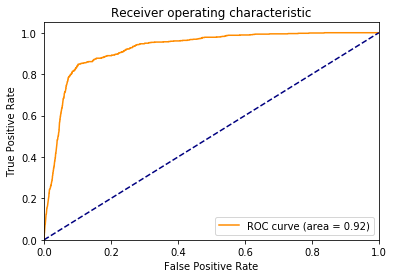

In [1137]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()